In [1]:
import random
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np

### ``` Data Preprocessing```

``` Load Trainig Data```

In [2]:
import os
folders = os.listdir("./dataset/multiclass/")
print(folders)

['cats', 'dogs', 'horses', 'humans']


In [3]:
image_data = []
labels = []
label_dict = {
    "cats" : 0,
    "dogs" : 1,
    "horses" : 2,
    "humans" : 3
}

In [4]:
for image_folder in folders:
    path = os.path.join("./dataset/multiclass/", image_folder)
    
    for each_image in os.listdir(path):
        
        img = image.load_img(os.path.join(path, each_image), target_size = ((224, 224)))
        img_array = image.img_to_array(img)
        
        image_data.append(img_array)
        labels.append(label_dict[image_folder])

```Shuffle the Data```

In [5]:
combined = list(zip(image_data, labels))
random.shuffle(combined)
image_data[:], labels[:] = zip(*combined)

In [6]:
len(image_data), len(labels)

(724, 724)

``` Convert them into a Numpy array```

In [7]:
x_train = np.array(image_data)
y_train = np.array(labels)
x_train.shape, y_train.shape

((724, 224, 224, 3), (724,))

In [8]:
x_train = x_train.astype("uint8")

``` Have a look on Dataset```

dogs


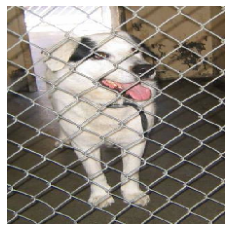

dogs


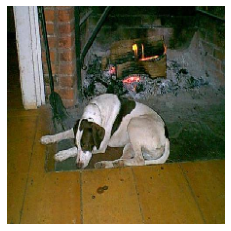

humans


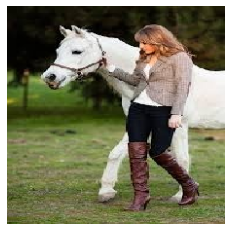

cats


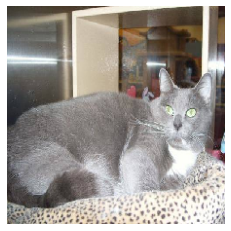

humans


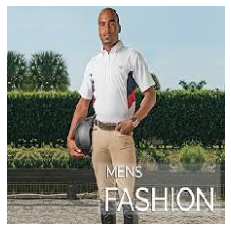

In [9]:
for i in range(5):
    print(list(label_dict.keys())[labels[i]])
    plt.imshow(x_train[i])
    plt.axis("off")
    plt.show()

### ``` Modeling ```

In [10]:
from keras.applications.resnet50 import ResNet50
from keras.optimizers import Adam
from keras.layers import *
from keras.models import Model

In [11]:
# Model Instantiation
model = ResNet50(include_top = False, weights = "imagenet",
                 input_shape = (224,224, 3)) # We do not require top layer that is the output layer, remove top

# Model Getting Downloaded :-

In [12]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [13]:
av1 = GlobalAveragePooling2D()(model.output) # It will convert 7x7x2048 into 1x1x2048 by taking mean of each channel
fc1 = Dense(256, activation = 'relu')(av1) # Dense layer
d1 = Dropout(0.5)(fc1) # Reduce some of the overfitting
fc2 = Dense(4, activation = "softmax")(d1) # Another Dense Layer

``` Combining Model and newly created layers ```

In [14]:
new_model = Model(inputs = model.input, outputs = fc2)
new_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [15]:
Y = new_model.predict(x_train)

In [16]:
Y.argmax(axis = 1)

array([2, 2, 3, 1, 0, 2, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 1, 3, 2, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 2, 3, 2, 2, 3, 1, 1, 1, 2, 3, 1, 0, 2, 1, 2,
       1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 2, 0, 1, 1, 2, 1, 1, 2, 1, 2, 2,
       1, 1, 2, 3, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 3, 2, 2, 2, 1, 1, 2, 1,
       0, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 3, 1, 2,
       2, 1, 2, 3, 1, 2, 2, 2, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 3, 0, 0, 1, 3, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 0, 1, 0, 2, 2,
       3, 1, 1, 1, 2, 1, 3, 2, 1, 2, 1, 1, 2, 2, 1, 3, 1, 2, 3, 2, 1, 2,
       1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 1, 2, 2, 1,
       2, 0, 2, 2, 2, 1, 0, 1, 0, 2, 2, 1, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 0, 2, 1, 1, 2, 3, 2, 2, 1, 1, 3, 1, 2, 1, 1, 1,
       2, 2, 1, 1, 1, 2, 1, 2, 3, 2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 3, 2, 1,
       0, 1, 2, 0, 2, 1, 2, 2, 3, 2, 1, 2, 2, 0, 1,

In [17]:
y_train

array([1, 1, 3, 0, 3, 3, 1, 0, 1, 3, 0, 0, 0, 3, 0, 1, 1, 0, 3, 0, 1, 2,
       2, 2, 2, 1, 1, 2, 0, 2, 3, 2, 3, 3, 2, 2, 0, 2, 3, 0, 0, 1, 2, 3,
       0, 1, 3, 2, 3, 3, 2, 1, 0, 2, 1, 3, 1, 2, 1, 3, 0, 1, 2, 2, 0, 3,
       0, 2, 3, 2, 2, 0, 2, 2, 2, 1, 2, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 2,
       0, 2, 0, 1, 1, 3, 2, 3, 0, 1, 3, 0, 3, 2, 0, 2, 2, 2, 3, 3, 1, 1,
       1, 0, 3, 3, 0, 3, 3, 3, 3, 0, 2, 1, 1, 2, 3, 3, 2, 0, 1, 1, 1, 3,
       3, 3, 1, 1, 3, 0, 2, 2, 3, 2, 0, 2, 2, 3, 0, 3, 1, 0, 2, 0, 0, 2,
       1, 3, 1, 1, 0, 2, 0, 1, 3, 0, 2, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 3,
       3, 0, 0, 2, 3, 3, 3, 2, 1, 3, 2, 0, 3, 0, 0, 2, 1, 1, 3, 3, 0, 1,
       2, 3, 1, 0, 2, 1, 0, 1, 3, 1, 3, 3, 3, 3, 2, 0, 3, 0, 2, 3, 3, 2,
       2, 0, 0, 1, 1, 1, 0, 0, 1, 1, 3, 0, 0, 2, 2, 3, 1, 3, 0, 1, 1, 0,
       0, 1, 1, 3, 1, 1, 2, 3, 0, 3, 3, 3, 1, 3, 1, 2, 3, 2, 1, 0, 2, 2,
       1, 1, 1, 1, 0, 2, 0, 1, 3, 2, 3, 1, 0, 3, 1, 0, 1, 0, 1, 3, 2, 1,
       2, 2, 0, 0, 3, 1, 2, 1, 3, 1, 2, 1, 2, 0, 2,

### Accuracy is not that good. So we will be using ``` Fine Tuning```

In [18]:
from keras.optimizers import Adam
adam = Adam(lr = 0.00003)
new_model.compile(loss = "categorical_crossentropy", optimizer = adam, metrics = ["accuracy"])

In [19]:
# Have a look on layers
for layer in range(len(new_model.layers)):
    print(layer, new_model.layers[layer])

0 <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x000002332F95E3D0>
1 <tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x000002332F988F10>
2 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002332F9A9790>
3 <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000002332F9A9400>
4 <tensorflow.python.keras.layers.core.Activation object at 0x000002332FA1C310>
5 <tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x000002332FA1C280>
6 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000002332FB68910>
7 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002332FBDFB20>
8 <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000002332FBDFAF0>
9 <tensorflow.python.keras.layers.core.Activation object at 0x000002332FD3DCD0>
10 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002332FD3DB20>
11 <tensorflow.python.keras.

#### ``` We will be restricting most of the layers to adapt new weights during Backpropagation```

In [20]:
for layer in range(169):
    new_model.layers[layer].trainable = False

In [21]:
new_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

``` Have a look at Trainable Params. There is a drastic change in it. ```

``` Load Validation Data```

In [22]:
x_val = []
y_val = []

In [23]:
folders = os.listdir("./dataset/val_images/")
print(folders)

['cats', 'dogs', 'horses', 'humans']


In [24]:
for image_folder in folders:
    path = os.path.join("./dataset/val_images/", image_folder)
    
    for each_image in os.listdir(path):
        
        img = image.load_img(os.path.join(path, each_image), target_size = ((224, 224)))
        img_array = image.img_to_array(img)
        
        x_val.append(img_array)
        y_val.append(label_dict[image_folder])

In [25]:
combined = list(zip(x_val, y_val))
random.shuffle(combined)
x_val[:], y_val[:] = zip(*combined)
#len(x_val), len(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)
x_val.shape, y_val.shape

((84, 224, 224, 3), (84,))

In [26]:
y_train = np.expand_dims(y_train, axis = 1)
y_val = np.expand_dims(y_val, axis = 1)

In [27]:
y_train.shape, y_val.shape

((724, 1), (84, 1))

In [28]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [29]:
y_val.shape, y_train.shape

((84, 4), (724, 4))

In [30]:
x_train.shape, x_val.shape

((724, 224, 224, 3), (84, 224, 224, 3))

In [40]:
history = new_model.fit(x_train, y_train,
                        shuffle = True,
                        epochs = 5,
                        batch_size = 16,
                        validation_data = (x_val, y_val)
                           )

s:\installation\anaconda\envs\gpu\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3349: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


Epoch 1/5
46/46 [==============================] - 21s 447ms/step - loss: 0.8468 - accuracy: 0.6519 - val_loss: 0.1575 - val_accuracy: 0.9286
Epoch 2/5
46/46 [==============================] - 20s 433ms/step - loss: 0.1799 - accuracy: 0.9475 - val_loss: 0.0563 - val_accuracy: 0.9881
Epoch 3/5
46/46 [==============================] - 20s 435ms/step - loss: 0.0807 - accuracy: 0.9807 - val_loss: 0.0439 - val_accuracy: 0.9881
Epoch 4/5
46/46 [==============================] - 20s 442ms/step - loss: 0.0526 - accuracy: 0.9876 - val_loss: 0.0397 - val_accuracy: 0.9881
Epoch 5/5
46/46 [==============================] - 21s 451ms/step - loss: 0.0324 - accuracy: 0.9931 - val_loss: 0.0359 - val_accuracy: 0.9881
